In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import skimage.io 
import cv2 
from scipy.ndimage import convolve
from functions import *

## Week 1 Quiz 

### 1. Which number appears in the center of the image when you convolve the image noisy_number_2023.png with an appropriately large Gaussian kernel? (In connection to 1.1.1) 

In [2]:
# define parameters for the Gaussian kernel
t = 90.  # variance/width of the Gaussian
N = 5.    # number of standard deviations to extend the kernel

# create the 1D kernel and get the x-coordinates
# kernel_1D will be used for both horizontal and vertical convolutions
kernel_1D = create_1D_kernel_2(t, N)  # x contains positions from -50 to 50

Sigma: 9.486832980505138


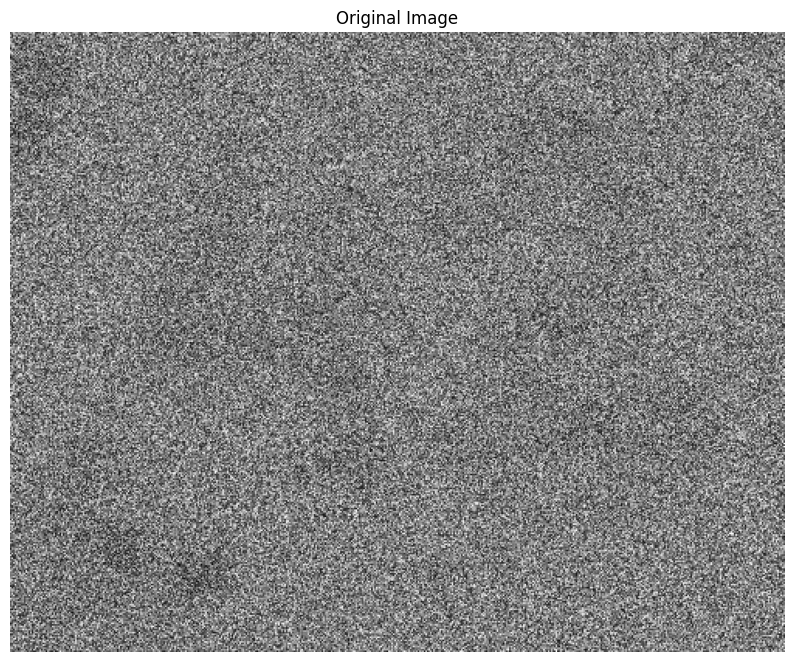

In [3]:
# Load the noisy image and convert it to grayscale
noisy_number = get_gray_image("data/noisy_number_2023.png")

# Create figure and display the original noisy image
plt.figure(figsize=(10, 10))
plt.imshow(noisy_number, cmap='gray') # Use gray colormap for grayscale visualization
plt.axis('off')  # Hide axis for better visualization
plt.title("Original Image") # Add descriptive title
plt.show()


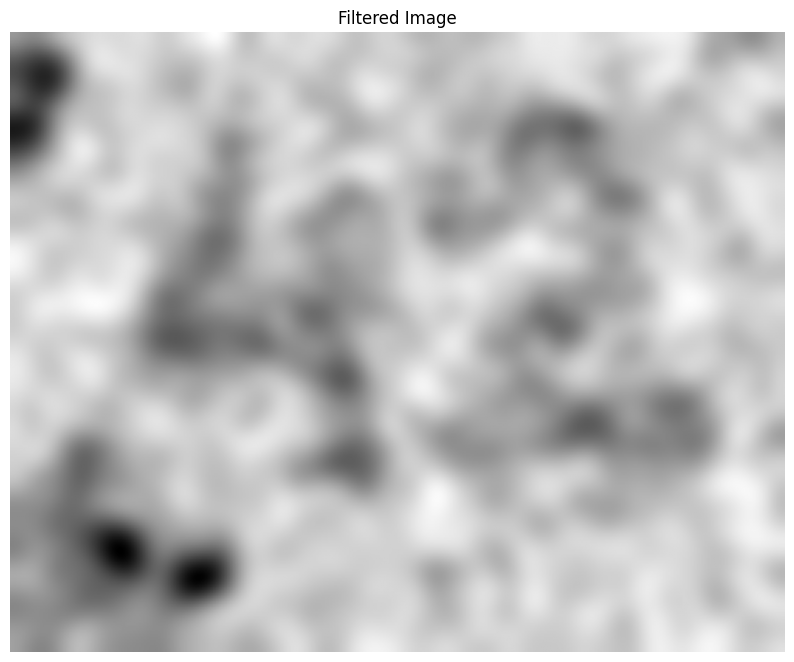

In [4]:
# create a 2D kernel as a outer product of two 1D kernels

kernel_2D = np.outer(kernel_1D, kernel_1D)

# apply the kernel to the image

filtered_image = convolve(noisy_number, kernel_2D)

# visualize the result

plt.figure(figsize=(10, 10))
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.title("Filtered Image")
plt.show()


noise_number_exercise = 42


### 2. What is the boundary length computed from the image fuel_cell_2.tif? (In connection to 1.1.2

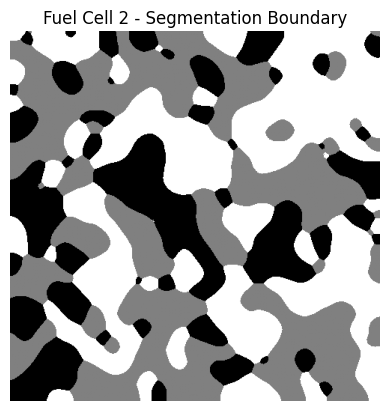

[  0 128 255]
Image type is uint8


In [5]:
# load the image 
image = skimage.io.imread('data/fuel_cells/fuel_cell_2.tif')

# display the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Fuel Cell 2 - Segmentation Boundary')
plt.show()

# find the unique values in the image
unique_values = np.unique(image)
print(unique_values)

print(f"Image type is {image.dtype}")


2025-02-09 13:23:27.385 | INFO     | functions:length_of_segmentation_boundary:128 - Original image values: [  0 128 255]
2025-02-09 13:23:27.391 | INFO     | functions:length_of_segmentation_boundary:132 - Unique values: [  0 128 255]
2025-02-09 13:23:27.392 | INFO     | functions:length_of_segmentation_boundary:134 - Mapping 0 to 0
2025-02-09 13:23:27.394 | INFO     | functions:length_of_segmentation_boundary:134 - Mapping 128 to 1
2025-02-09 13:23:27.395 | INFO     | functions:length_of_segmentation_boundary:134 - Mapping 255 to 2
2025-02-09 13:23:27.401 | INFO     | functions:length_of_segmentation_boundary:137 - After mapping, values: [0 1 2]
2025-02-09 13:23:27.404 | INFO     | functions:length_of_segmentation_boundary:144 - Row differences: (array([0, 1, 2], dtype=int32), array([238265,   3823,   1454]))
2025-02-09 13:23:27.406 | INFO     | functions:length_of_segmentation_boundary:146 - Column differences: (array([0, 1, 2], dtype=int32), array([238018,   3939,   1585]))
2025-02

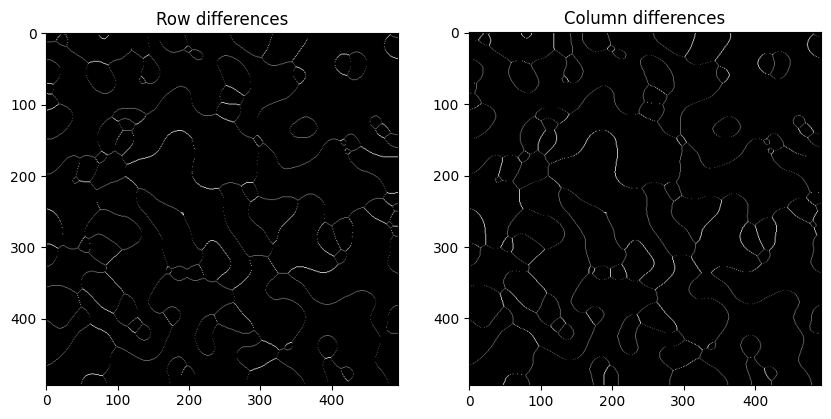

Length of the segmentation boundary is 10801


In [6]:
length_of_boundary = length_of_segmentation_boundary(image)
print(f"Length of the segmentation boundary is {length_of_boundary}")

### 3.  What is the length of the curve computed by smoothing dino_noisy.txt curve using Equation 1.10 and the parameter λ = 0.19? (In connection to 1.1.3)

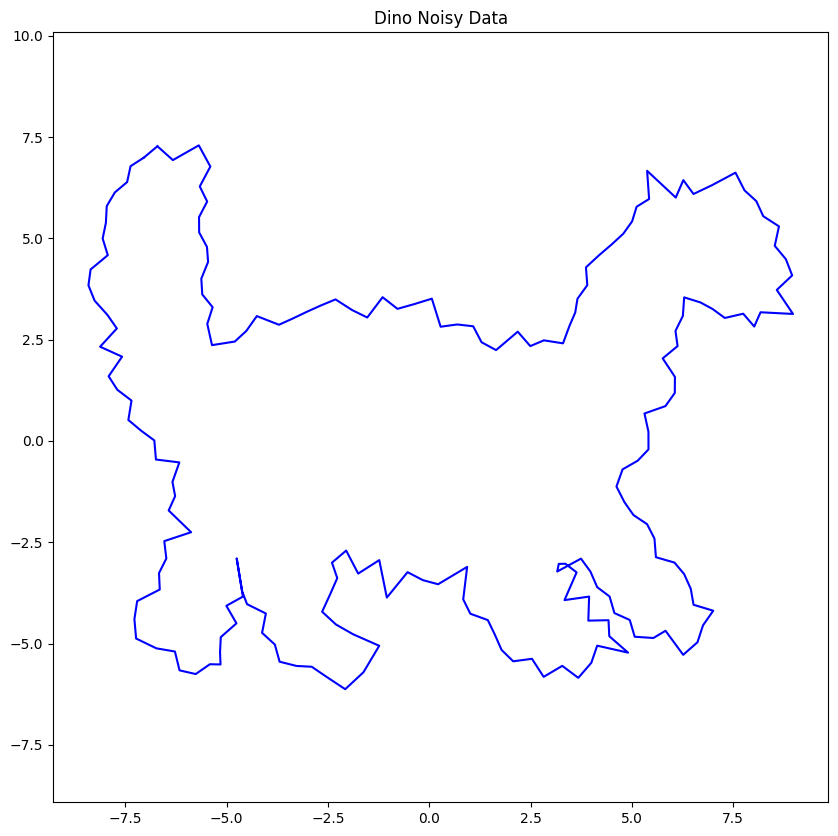

In [7]:
data = np.loadtxt('data/curves/dino_noisy.txt') 


# visualize the dino data
plt.figure(figsize=(10, 10))

# plot original data points
plt.plot(data[:, 0], data[:, 1], '-', color='b')

# connect last point to first point to close the curve
plt.plot([data[-1, 0], data[0, 0]], [data[-1, 1], data[0, 1]], '-', color='b')

plt.axis('equal')
plt.title('Dino Noisy Data')
plt.show()

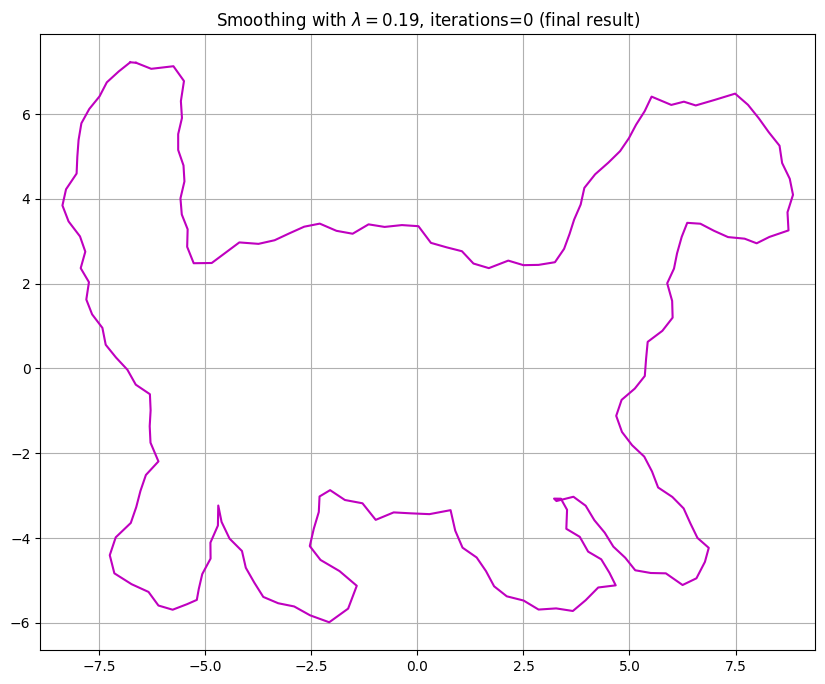

The total distance of the curve is 79.9300
Length of the dataset is 201
Length of the curve is 79.93


In [8]:
# curve length 

length_of_curve = smoothing_equation_1_10_2(data, LAMBDA=0.19, iterations=0)
print(f"Length of the curve is {length_of_curve}")

In [9]:
data = create_entry(image_convolution = noise_number_exercise, length_of_boundary = length_of_boundary, length_of_curve = length_of_curve)

name_of_file = "quiz.txt"

save_to_file(name_of_file, data)

print(f"Data saved to {name_of_file}")

Data saved to quiz.txt
